In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import math
plt.rcParams['figure.figsize'] = [12, 6]


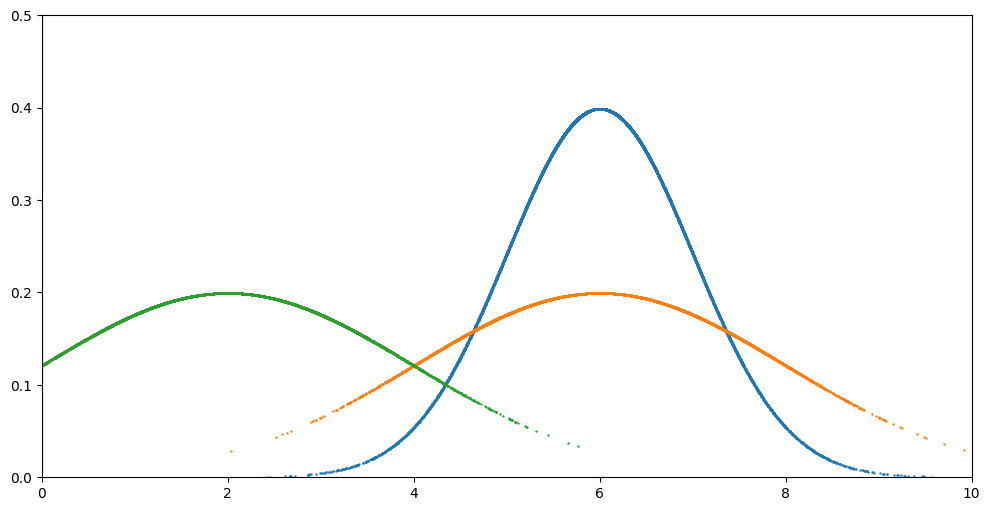

In [37]:
# Zadanie 1

def K(x, xi=3, h=1):
  return (1/math.sqrt(2*math.pi*h))*math.e ** ( -(x-xi)**2/(2*h) )

seed = 2
m = 10000
mean = 6 #przesuwa szczyt kapelusz
std = 1
h = 1 # wyostrcza albo wyplaszcza
np.random.seed(seed)

X = np.random.normal(mean, std, m)
Y = [K(x, mean, h) for x in X]

X2 = np.random.normal(mean, std, m)
Y2 = [K(x, mean, 4) for x in X2]

X3 = np.random.normal(2, std, m)
Y3 = [K(x, 2, 4) for x in X3]

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.scatter(X, Y, s=0.5)
plt.scatter(X2, Y2, s=0.5)
plt.scatter(X3, Y3, s=0.5)

plt.show()

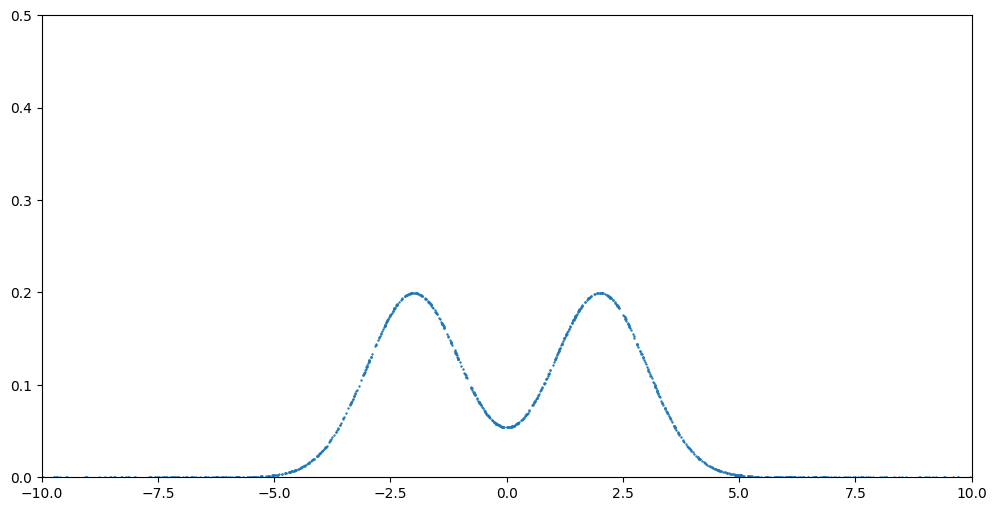

In [38]:
# Zadanie 2
# Srednia z funkcji K

def f(x, X, h=1):
  ret = 0.0
  for xi in X:
      ret += K(x, xi, h)
  return ret/len(X)

m = 1000
mean = 0 #przesuwa szczyt kapelusza
std = 1
h = 1 # wyostrcza albo wyplaszcza

X = np.random.normal(mean, 5, m)
Xi = [-2, 2]
Ys = []

for xi in Xi:
  Ys.append( [K(x, xi, h) for x in X] )

Y = [(y1+y2)/2 for y1, y2 in zip(Ys[0], Ys[1])]


plt.xlim(-10, 10)
plt.ylim(0, 0.5)

#plt.scatter(X, Ys[0], s=0.5)
#plt.scatter(X, Ys[1], s=0.5)
plt.scatter(X, Y, s=0.5)

plt.show()

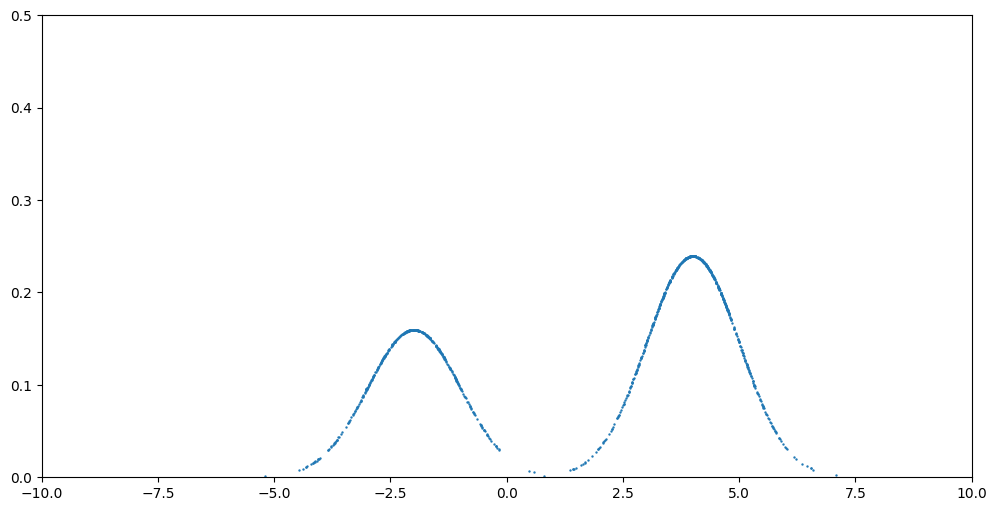

In [39]:
# Zadanie 3
# Rozne skale i rozne rozklady

m = 1000
p1 = 0.4
p2 = 1 - p1
m1 = int(p1 * m)
m2 = m - m1
h = 1 # wyostrcza albo wyplaszcza

X1 = np.random.normal(-2, 1, m1)
X2 = np.random.normal(4, 1, m2)

Y1 = [K(x, -2, h) for x in X1]
Y2 = [K(x, 4, h) for x in X2]



X = np.concatenate([X1, X2])
Y1 = [y*p1 for y in Y1]
Y2 = [y*p2 for y in Y2]
Y = [y1 for y1 in np.hstack([Y1, Y2])]



plt.xlim(-10, 10)
plt.ylim(0, 0.5)

plt.scatter(X, Y, s=0.5)

plt.show()


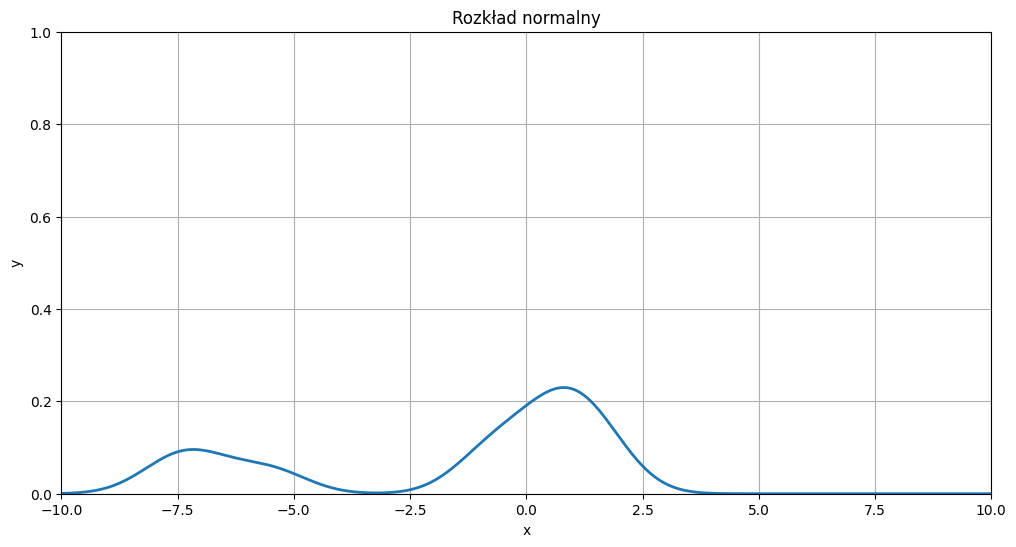

In [40]:
# Zadanie 4
# Rozne skale i rozne rozklady dla 3 podzbiorow
h = 0.8
m = 10

x1 = np.concatenate([np.random.normal(-7,1,int(0.3*m)), 
                     np.random.normal(0,1,int(0.6*m)),
                     np.random.normal(3,1,int(0.1*m))])

x = np.linspace(-10.0, 10.0, num=1000)
y = np.stack([1/(np.sqrt(2 * np.pi)) * np.exp( -((x - x1[i])/h)**2/2 ) for i in range(m)])
y = np.sum(y, axis=0)/(m*h)

plt.plot(x, y, linewidth=2)

plt.title("Rozkład normalny")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.grid()

plt.show()

In [41]:
def calculate_h(m, x):
    V = 1/(m-1) * np.sum(np.power(x,2)) - 1/(m*(m-1))*(np.sum(x)**2)

    sigma = np.sqrt(V)
    c8 = 105/(32 * np.sqrt(np.pi) * sigma**9 )

    K_6 = -15/np.sqrt(2*np.pi)
    U_K = 1

    hII = ((-2*K_6)/(U_K*c8*m))**(1/9)

    def K_6_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**6 - 15*x**4 + 45*x**2-15) * np.exp(-1/2*x**2) 
    xi = 6
    C_6_hII = 1/(m**2 * hII**(xi+1)) * np.sum([np.sum([K_6_x((x_i-x_j)/hII) for x_j in x]) for x_i in x ])

    K_4 = 3/(np.sqrt(2*np.pi))
    hI = ((-2*K_4)/(U_K*C_6_hII*m))**(1/7)

    def K_4_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**4 - 6*x**2 + 3) * np.exp(-1/2*x**2) 
    xi = 4
    C_4_hI = 1/(m**2 * hI**(xi+1)) * np.sum([np.sum([K_4_x((x_i-x_j)/hI) for x_j in x]) for x_i in x ])

    Z_f = C_4_hI

    U_K = 1
    W_K = 1/(2*np.sqrt(np.pi))
    h=( (W_K)/(U_K**2 * Z_f * m) )**(1/5)

    print(f'V = {V} \n'
        f'sigma = {sigma} \n'
        f'c8 = {c8} \n'
        f'K_6 = {K_6} \n'
        f'U_K = {U_K} \n'
        f'hII = {hII} \n'
        f'C_6_hII = {C_6_hII} \n'
        f'K_4 = {K_4} \n'
        f'hI = {hI} \n'
        f'C_4_hI = {C_4_hI} \n'
        f'Z_f = {Z_f} \n'
        f'W_K = {W_K} \n'
        f'h = {h}')
    
    return h

In [42]:
# Zadanie 5
# Zastosowac estymator jadrowy
# Wsadzic H z tego algorytmu co wyslal
# Dla m = 100 jakie H wychodzi?
# Powinno wychodzic mniejsze

# Potem dla m = 1000 jakie H wychodzi

# Potem dla m = 10000

# Zaleznosci miedzy m a h, m sie zwieksza to estymacja jest lepsza.
# Jak oddalenie rozkladow wplywa na estymacje (-7, 0, 4) - sprawdzic bardziej rozjechane

def display_for_m(m):
    x1 = np.concatenate([np.random.normal(-7,1,int(0.3*m)), 
                         np.random.normal(0,1,int(0.4*m)),
                         np.random.normal(4,2,int(0.3*m))])
    
    x = np.linspace(-10.0, 10.0, num=m)
    h = calculate_h(m, x1)
    y = np.stack([1/(np.sqrt(2 * np.pi)) * np.exp( -((x - x1[i])/h)**2/2 ) for i in range(m)])
    y = np.sum(y, axis=0)/(m*h)
    
    plt.plot(x, y, linewidth=2)
    plt.title(f"m = {m}, h={h}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-10, 10])
    plt.ylim([0, 1])
    plt.grid()
    plt.show()

V = 17.040552378745204 
sigma = 4.1280203946619745 
c8 = 5.318484231086922e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 3.932726241523067 
C_6_hII = -8.071704613342066e-05 
K_4 = 1.1968268412042982 
hI = 3.133384727292106 
C_4_hI = 0.0007454499325599275 
Z_f = 0.0007454499325599275 
W_K = 0.28209479177387814 
h = 2.068213257302288


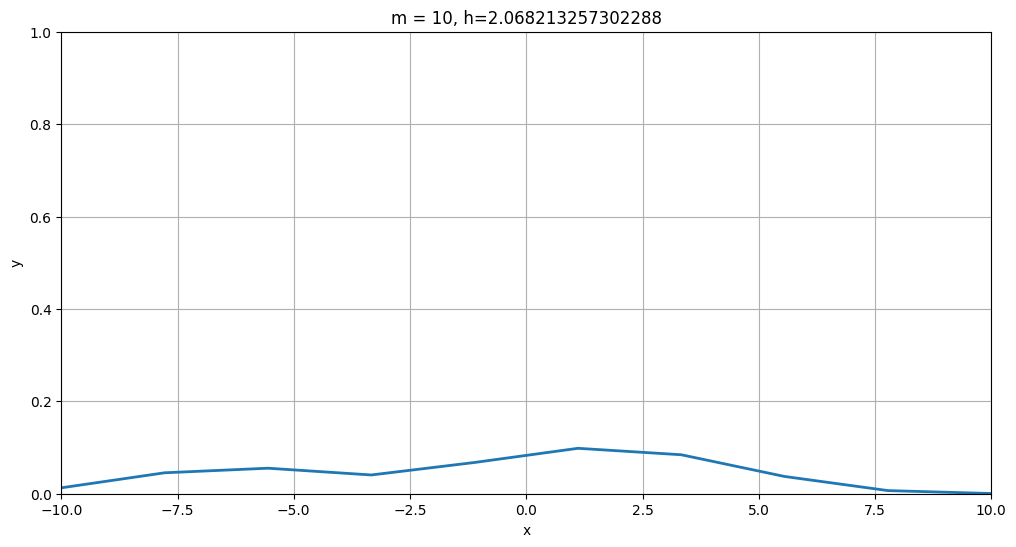

In [43]:
display_for_m(10)

V = 22.78010011973382 
sigma = 4.772850313987839 
c8 = 1.440336797700312e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 3.520615404705981 
C_6_hII = -0.00015873646980659457 
K_4 = 1.1968268412042982 
hI = 2.0473769039663106 
C_4_hI = 0.003860893235187593 
Z_f = 0.003860893235187593 
W_K = 0.28209479177387814 
h = 0.9391640395216311


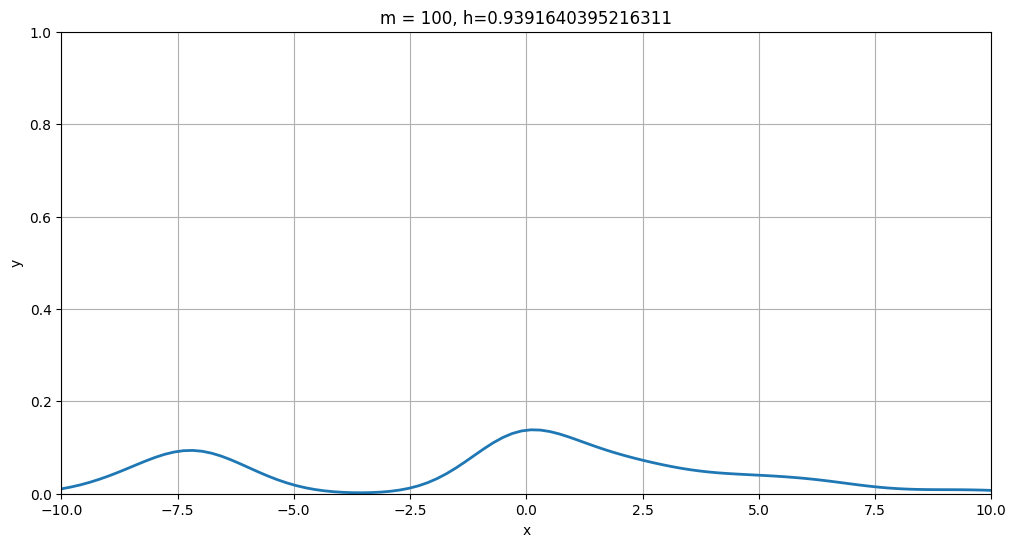

In [44]:
display_for_m(100)

V = 21.045505021245745 
sigma = 4.587538013057303 
c8 = 2.0570616195594165e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 2.620048529029039 
C_6_hII = -0.0006767286574275201 
K_4 = 1.1968268412042982 
hI = 1.1977828951846927 
C_4_hI = 0.011261597658243415 
Z_f = 0.011261597658243415 
W_K = 0.28209479177387814 
h = 0.478364576523884


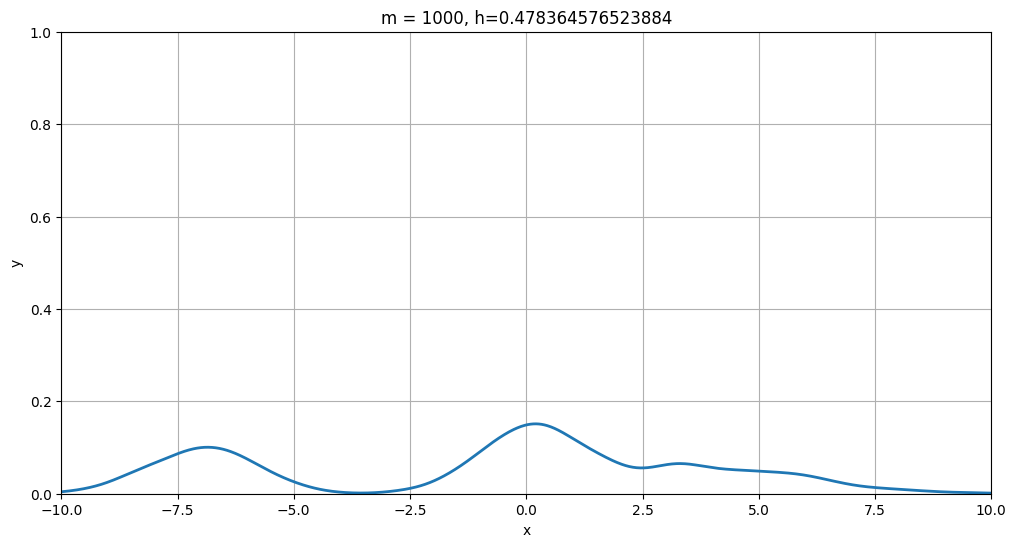

In [45]:
display_for_m(1000)

V = 20.633109582186407 
sigma = 4.542368279013317 
c8 = 2.2486574557084555e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 2.008634375223532 
C_6_hII = -0.0028095379392295548 
K_4 = 1.1968268412042982 
hI = 0.7034022830630666 
C_4_hI = 0.03163306816562564 
Z_f = 0.03163306816562564 
W_K = 0.28209479177387814 
h = 0.24549957812762846


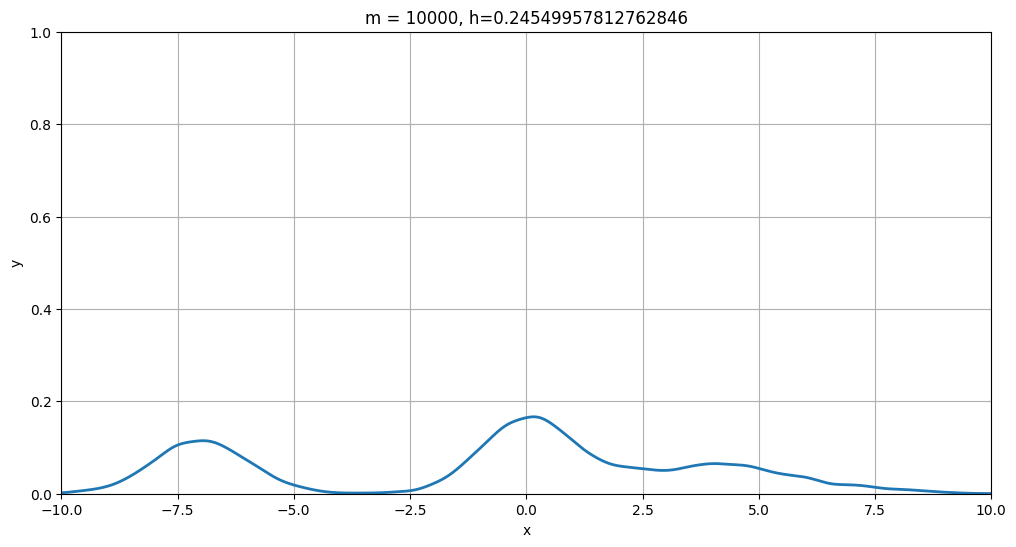

In [46]:
display_for_m(10000)

In [47]:
# Dla wiecej niz 10000 nie da sie policzyc na moim sprzecie. Zbyt dlugo sie liczy juz

In [48]:
# Sprawdzenie dla bardziej rozjechanego zakresu
def display_for_m2(m):
    x1 = np.concatenate([np.random.normal(-8,1,int(0.3*m)), 
                         np.random.normal(0,1,int(0.6*m)),
                         np.random.normal(8,1,int(0.1*m))])
    
    x = np.linspace(-10.0, 10.0, num=m)
    h = calculate_h(m, x1)
    y = np.stack([1/(np.sqrt(2 * np.pi)) * np.exp( -((x - x1[i])/h)**2/2 ) for i in range(m)])
    y = np.sum(y, axis=0)/(m*h)
    
    plt.plot(x, y, linewidth=2)
    plt.title(f"m = {m}, h={h}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-10, 10])
    plt.ylim([0, 1])
    plt.grid()
    plt.show()

V = 29.81841035889434 
sigma = 5.460623623625267 
c8 = 4.2882904424268593e-07 
K_6 = -5.984134206021491 
U_K = 1 
hII = 5.202284816102603 
C_6_hII = -1.334156802504964e-05 
K_4 = 1.1968268412042982 
hI = 4.05222444047644 
C_4_hI = 0.0002887568276276066 
Z_f = 0.0002887568276276066 
W_K = 0.28209479177387814 
h = 2.5001873945703847


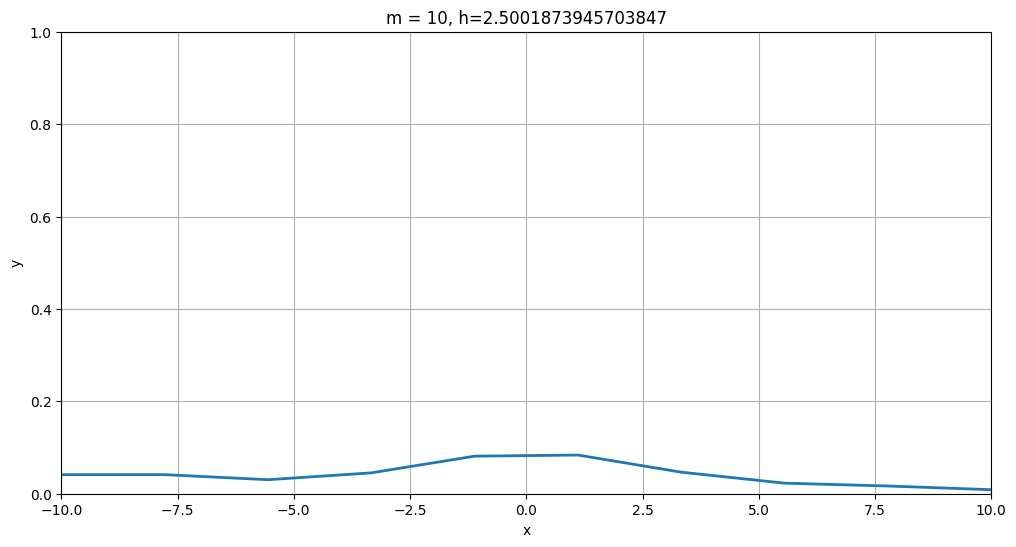

In [49]:
display_for_m2(10)

V = 25.75047500168996 
sigma = 5.0744925856375 
c8 = 8.29718519506419e-07 
K_6 = -5.984134206021491 
U_K = 1 
hII = 3.743116920240207 
C_6_hII = -0.0001907487488311685 
K_4 = 1.1968268412042982 
hI = 1.9943434237981963 
C_4_hI = 0.006865388129327007 
Z_f = 0.006865388129327007 
W_K = 0.28209479177387814 
h = 0.8370395804795576


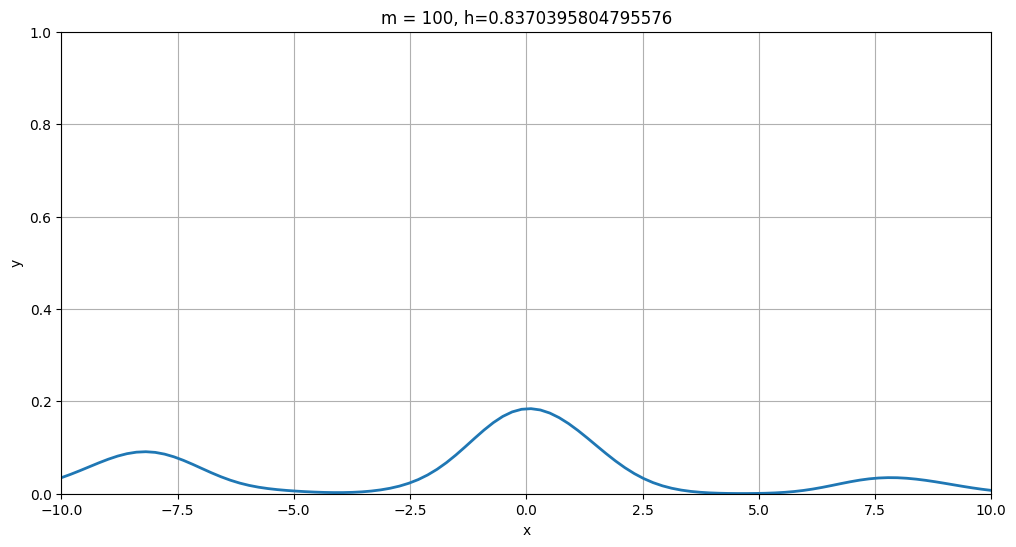

In [50]:
display_for_m2(100)

V = 23.813249204757795 
sigma = 4.879882089226931 
c8 = 1.1797240375364255e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 2.7870129584372494 
C_6_hII = -0.001145059130876021 
K_4 = 1.1968268412042982 
hI = 1.1110858809307989 
C_4_hI = 0.02937760403591766 
Z_f = 0.02937760403591766 
W_K = 0.28209479177387814 
h = 0.39488963901797547


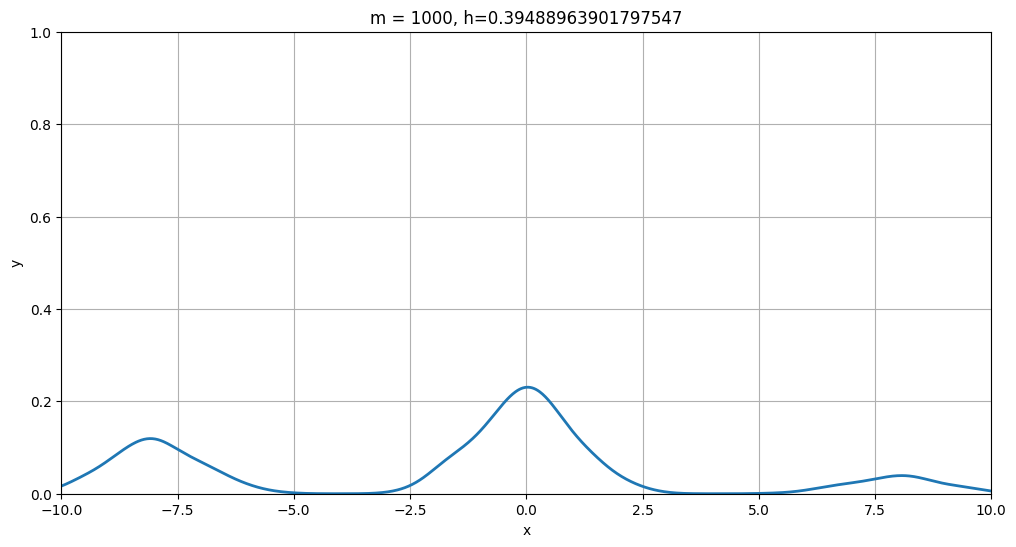

In [51]:
display_for_m2(1000)

V = 24.09517410152352 
sigma = 4.908683540576182 
c8 = 1.1188685727097163e-06 
K_6 = -5.984134206021491 
U_K = 1 
hII = 2.170618913100764 
C_6_hII = -0.003661319068689291 
K_4 = 1.1968268412042982 
hI = 0.6772902439113883 
C_4_hI = 0.057689966880118085 
Z_f = 0.057689966880118085 
W_K = 0.28209479177387814 
h = 0.21770026398586947


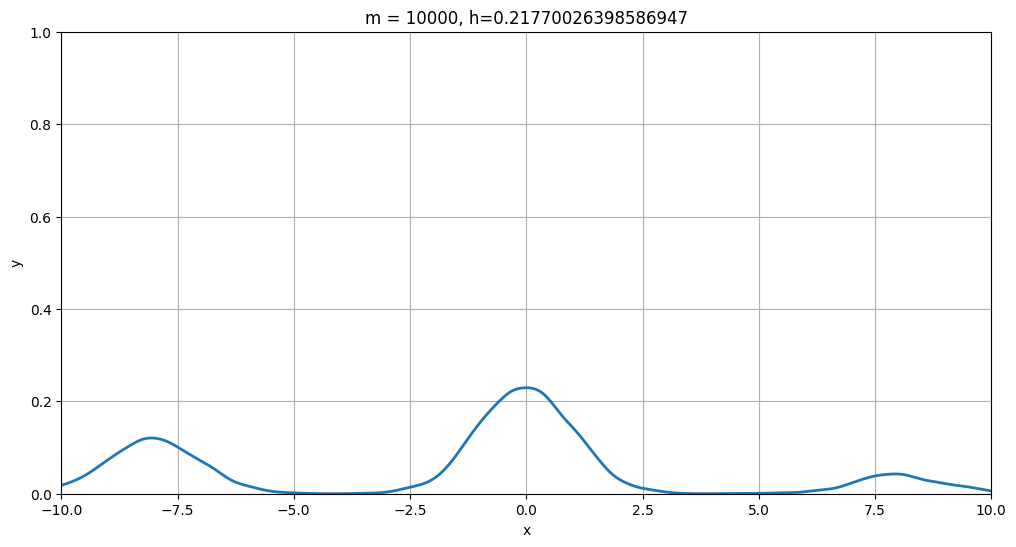

In [52]:
display_for_m2(10000)